In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'NNdata.csv'
model_save_path = 'keypoint_classifier.hdf5'
tflite_save_path = 'keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

In [4]:
labelencoder = LabelEncoder()
dataDF = pd.read_csv(dataset,header=None)
dataDF = dataDF.dropna(how='any',axis=0) 
dataDF.iloc[:,0] = labelencoder.fit_transform(dataDF.iloc[:,0])
dataDF

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0.189979,-0.029542,0.347592,-0.146429,0.488392,-0.246351,0.620975,...,0.023009,-0.955324,-0.082270,-0.447990,-0.092348,-0.611341,-0.096265,-0.714146,-0.090139,-0.817736
1,0,0,0,0.188806,-0.043216,0.346820,-0.154459,0.485416,-0.249264,0.615063,...,0.031846,-0.957950,-0.068492,-0.464786,-0.080826,-0.615390,-0.084741,-0.712662,-0.081181,-0.812421
2,0,0,0,0.189317,-0.050926,0.345531,-0.165171,0.481700,-0.261406,0.607133,...,0.023504,-0.954448,-0.068993,-0.463621,-0.079450,-0.615029,-0.080088,-0.713491,-0.074662,-0.813417
3,0,0,0,0.191141,-0.053518,0.348415,-0.170180,0.484769,-0.265892,0.610407,...,0.024415,-0.953004,-0.068634,-0.468245,-0.078674,-0.619000,-0.080905,-0.716928,-0.077011,-0.814847
4,0,0,0,0.187831,-0.055737,0.343638,-0.172624,0.478662,-0.268575,0.602845,...,0.020925,-0.950581,-0.069921,-0.470933,-0.078640,-0.621061,-0.079503,-0.716108,-0.073938,-0.810883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,5,0,0,0.282715,-0.140111,0.530369,-0.453676,0.520889,-0.775058,0.283361,...,0.035748,-0.529554,-0.222350,-0.718365,-0.125372,-0.914440,-0.094607,-0.708231,-0.134044,-0.599588
1796,5,0,0,0.323558,-0.132468,0.628410,-0.465373,0.591364,-0.811963,0.326674,...,0.135314,-0.546032,-0.114209,-0.767863,-0.063072,-0.911176,-0.030203,-0.684243,-0.041798,-0.610799
1797,5,0,0,0.293363,-0.149906,0.569016,-0.463928,0.539303,-0.783169,0.317882,...,0.143545,-0.567247,-0.082660,-0.751161,-0.055635,-0.881529,-0.028896,-0.670056,-0.029279,-0.606313
1798,5,0,0,0.308319,-0.148552,0.573109,-0.470868,0.539157,-0.795783,0.327849,...,0.166022,-0.571894,-0.064291,-0.743222,-0.039114,-0.889257,-0.014542,-0.679133,-0.012207,-0.610962


# Dataset reading

In [5]:
X_dataset = pd.concat([dataDF.pop(x) for x in range(1,43)], axis=1)
# Xx_dataset = X_dataset.iloc[:, 0::2]
# Xy_dataset = X_dataset.iloc[:, 1::2]
# Xx_dataset.update(Xx_dataset.sub(Xx_dataset.iloc[:,0],axis=0))
# Xy_dataset.update(Xy_dataset.sub(Xy_dataset.iloc[:,0],axis=0))
# X_dataset = Xx_dataset.join([Xy_dataset]).sort_index(axis=1)
# X_dataset = pd.concat([X_dataset.pop(x) for x in range(13,21)], axis=1)
X_dataset

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
0,0,0,0.189979,-0.029542,0.347592,-0.146429,0.488392,-0.246351,0.620975,-0.263724,...,0.023009,-0.955324,-0.082270,-0.447990,-0.092348,-0.611341,-0.096265,-0.714146,-0.090139,-0.817736
1,0,0,0.188806,-0.043216,0.346820,-0.154459,0.485416,-0.249264,0.615063,-0.276564,...,0.031846,-0.957950,-0.068492,-0.464786,-0.080826,-0.615390,-0.084741,-0.712662,-0.081181,-0.812421
2,0,0,0.189317,-0.050926,0.345531,-0.165171,0.481700,-0.261406,0.607133,-0.289210,...,0.023504,-0.954448,-0.068993,-0.463621,-0.079450,-0.615029,-0.080088,-0.713491,-0.074662,-0.813417
3,0,0,0.191141,-0.053518,0.348415,-0.170180,0.484769,-0.265892,0.610407,-0.291610,...,0.024415,-0.953004,-0.068634,-0.468245,-0.078674,-0.619000,-0.080905,-0.716928,-0.077011,-0.814847
4,0,0,0.187831,-0.055737,0.343638,-0.172624,0.478662,-0.268575,0.602845,-0.298292,...,0.020925,-0.950581,-0.069921,-0.470933,-0.078640,-0.621061,-0.079503,-0.716108,-0.073938,-0.810883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0,0,0.282715,-0.140111,0.530369,-0.453676,0.520889,-0.775058,0.283361,-0.878303,...,0.035748,-0.529554,-0.222350,-0.718365,-0.125372,-0.914440,-0.094607,-0.708231,-0.134044,-0.599588
1796,0,0,0.323558,-0.132468,0.628410,-0.465373,0.591364,-0.811963,0.326674,-0.933251,...,0.135314,-0.546032,-0.114209,-0.767863,-0.063072,-0.911176,-0.030203,-0.684243,-0.041798,-0.610799
1797,0,0,0.293363,-0.149906,0.569016,-0.463928,0.539303,-0.783169,0.317882,-0.949243,...,0.143545,-0.567247,-0.082660,-0.751161,-0.055635,-0.881529,-0.028896,-0.670056,-0.029279,-0.606313
1798,0,0,0.308319,-0.148552,0.573109,-0.470868,0.539157,-0.795783,0.327849,-0.958091,...,0.166022,-0.571894,-0.064291,-0.743222,-0.039114,-0.889257,-0.014542,-0.679133,-0.012207,-0.610962


In [6]:

y_dataset = pd.concat([dataDF.pop(x) for x in range(0,1)], axis=1)
y_dataset

,0
0,0
1,0
2,0
3,0
4,0
...,...
1795,5
1796,5
1797,5
1798,5


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.60, random_state=RANDOM_SEED)
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test

,0
1591,5
943,3
869,2
162,0
1271,4
...,...
477,1
1762,5
668,2
873,2


(array([0, 1, 2, 3, 4, 5], dtype=int64), array([300, 300, 300, 300, 300, 300], dtype=int64))


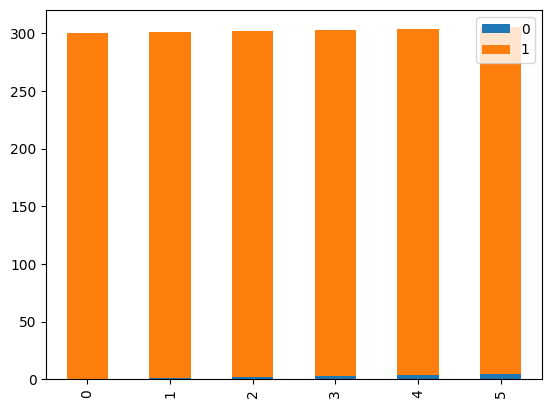

In [8]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 32)                1376      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 6)                 1

In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 10s - loss: 2.1628 - accuracy: 0.1641
Epoch 1: val_loss improved from inf to 1.86406, saving model to keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 2s 31ms/step - loss: 2.0344 - accuracy: 0.1491 - val_loss: 1.8641 - val_accuracy: 0.1889
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.8474 - accuracy: 0.1875
Epoch 2: val_loss improved from 1.86406 to 1.77705, saving model to keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 9ms/step - loss: 1.8287 - accuracy: 0.1491 - val_loss: 1.7770 - val_accuracy: 0.1917
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.7913 - accuracy: 0.1016
Epoch 3: val_loss improved from 1.77705 to 1.71853, saving model to keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 1.7502 - accuracy: 0.2009 - val_loss: 1.7185 - val_accuracy: 0.3347

In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

12/12 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9944


In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 92ms/step
[1.7384824e-15 5.2648570e-08 3.0774447e-07 2.0628200e-17 3.4347531e-12
 9.9999964e-01]
5


# Confusion matrix

23/23 [==============================] - 0s 1ms/step


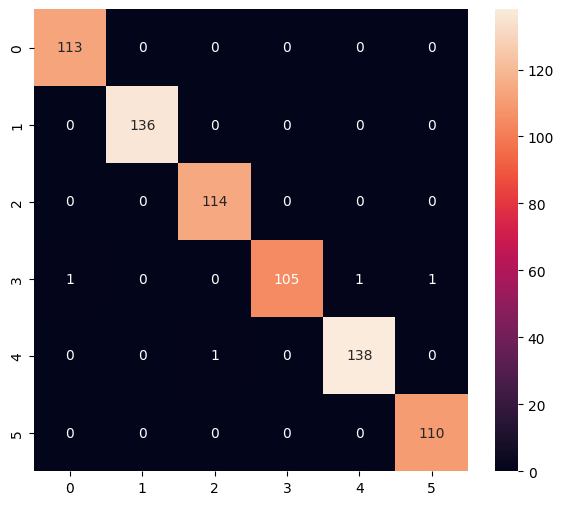

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           1       1.00      1.00      1.00       136
           2       0.99      1.00      1.00       114
           3       1.00      0.97      0.99       108
           4       0.99      0.99      0.99       139
           5       0.99      1.00      1.00       110

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    y_true = y_true.iloc[:,0].to_list()
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\adity\AppData\Local\Temp\tmpngpfdowy\assets


7768

## Download model

In [20]:
!zip -r model.zip keypoint_classifier  

'zip' is not recognized as an internal or external command,
operable program or batch file.
